## One-way ANOVA Testing for Time Completion on Task 1 (Urgent Task)

In [1]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sample_df_orig = pd.read_csv("data1.csv")

def extract_numerical(value):
    return float(value.split()[0])
    
sample_df = sample_df_orig.apply(lambda x: x.map(extract_numerical))

sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Default List     42 non-null     float64
 1   Default Card     42 non-null     float64
 2   Redesigned List  42 non-null     float64
 3   Redesigned Card  42 non-null     float64
 4   Carousel         42 non-null     float64
dtypes: float64(5)
memory usage: 1.8 KB


In [3]:
sample_df.describe()

,Default List,Default Card,Redesigned List,Redesigned Card,Carousel
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,28963.785714,18664.285714,5463.380952,7699.309524,6180.523810
std,40452.139277,32017.060507,4182.310401,8481.554297,4241.104724
min,1247.000000,1357.000000,1297.000000,1823.000000,760.000000
25%,8342.500000,6590.000000,2860.750000,3044.250000,3178.500000
50%,16230.500000,9117.500000,4495.000000,5786.500000,5157.000000
75%,25476.250000,15707.000000,6618.250000,9628.750000,7735.750000
max,201185.000000,195647.000000,21895.000000,54599.000000,18039.000000


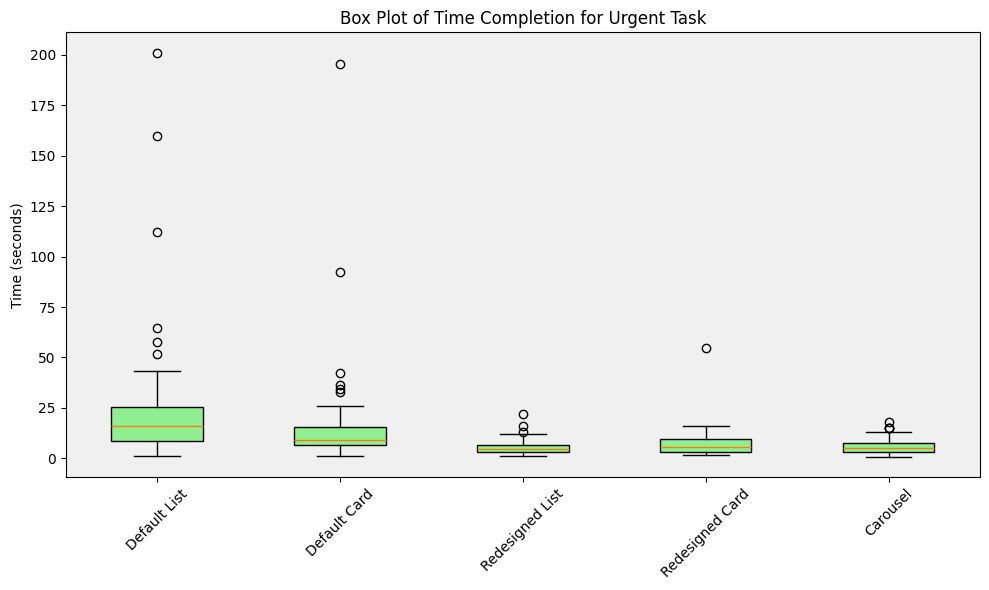

Outliers in Default List: [2, 9, 10, 17, 18, 25]
Outliers in Default Card: [6, 9, 10, 17, 18, 39]
Outliers in Redesigned List: [18, 26, 30]
Outliers in Redesigned Card: [28]
Outliers in Carousel: [1, 5, 14, 15]


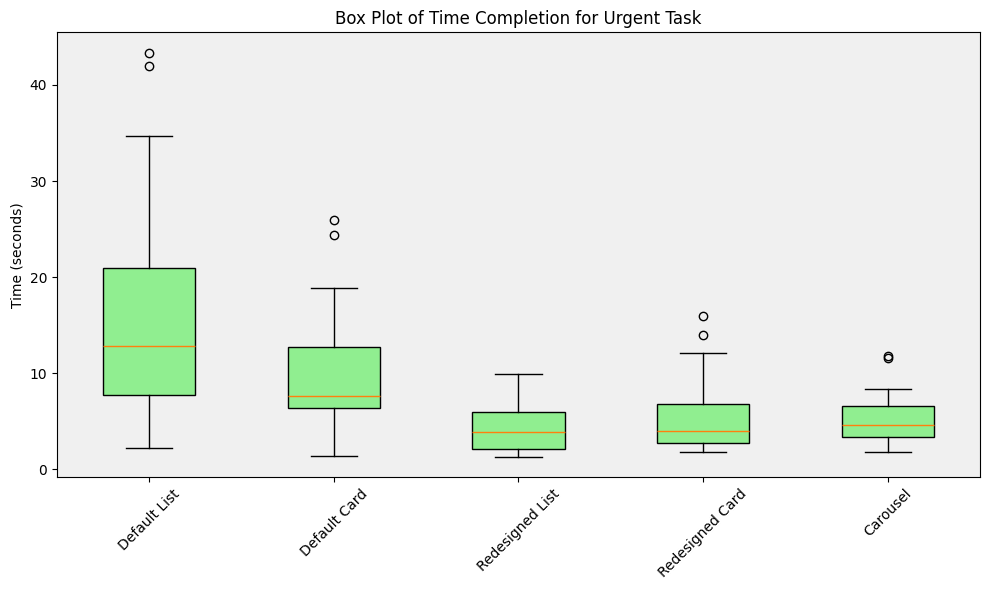

Outliers in Default List: [27, 36]
Outliers in Default Card: [4, 31]
Outliers in Redesigned List: []
Outliers in Redesigned Card: [13, 19]
Outliers in Carousel: [4, 13]


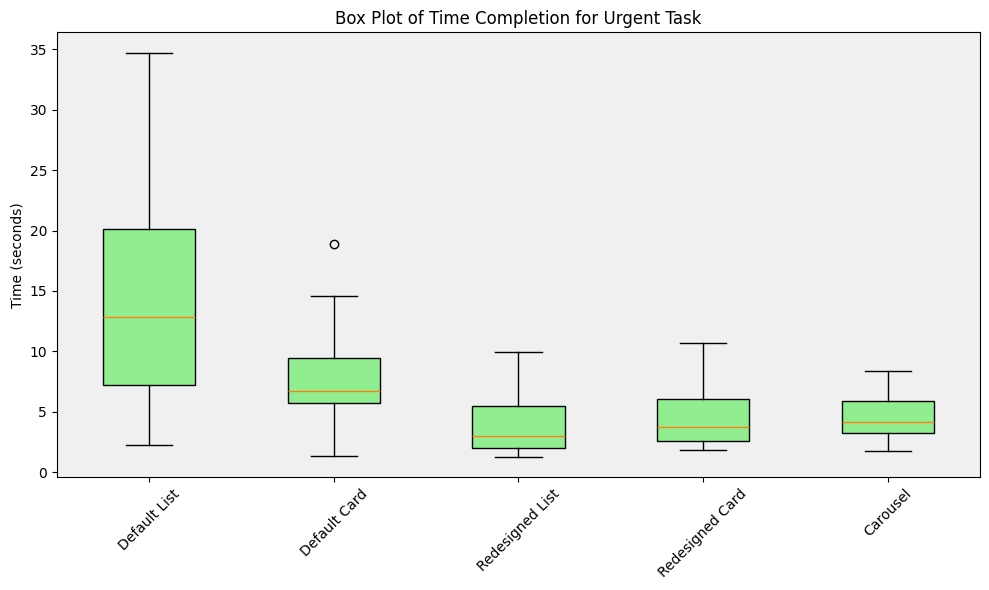

Outliers in Default List: []
Outliers in Default Card: [3]
Outliers in Redesigned List: []
Outliers in Redesigned Card: []
Outliers in Carousel: []


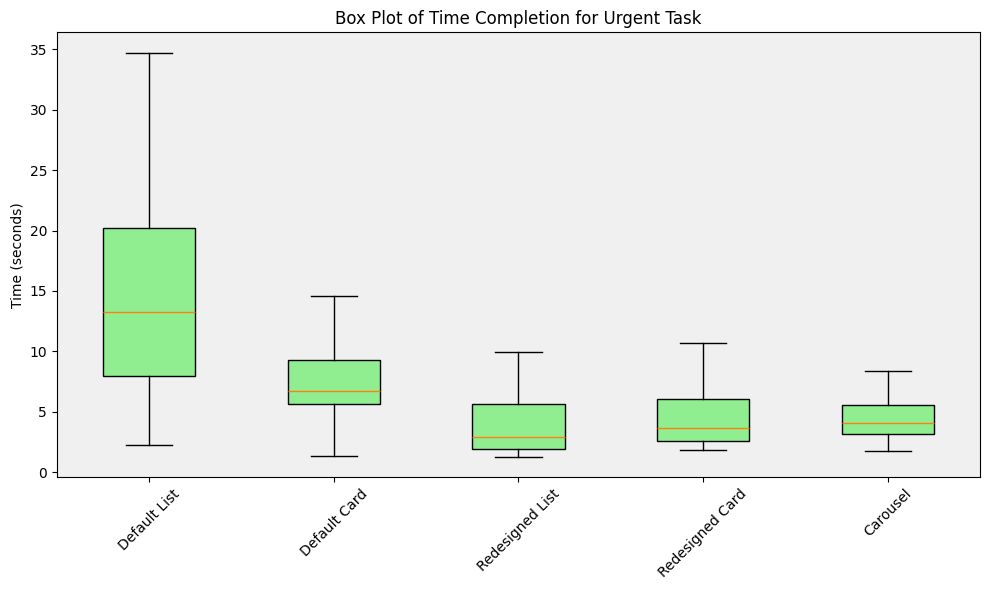

Outliers in Default List: []
Outliers in Default Card: []
Outliers in Redesigned List: []
Outliers in Redesigned Card: []
Outliers in Carousel: []
    Default List  Default Card  Redesigned List  Redesigned Card  Carousel
0         4585.0        9220.0           1481.0           6057.0    6829.0
7        13782.0        8398.0           3128.0           5227.0    2326.0
8         2241.0        5256.0           9960.0           6453.0    3642.0
11       12813.0        3599.0           2853.0           7591.0    3839.0
12        3279.0        7591.0           4308.0           3648.0    6375.0
16        7204.0        4787.0           6250.0          10700.0    6339.0
20        5955.0        1357.0           6238.0           4125.0    3877.0
21       24502.0       14594.0           2995.0           2787.0    4591.0
22       21321.0        6558.0           2884.0           1823.0    3941.0
23       22333.0        6772.0           1372.0           2634.0    1800.0
24       16150.0       11142

In [4]:
while True:
    # Convert milliseconds to seconds
    sample_df_seconds = sample_df / 1000

    # Create boxplots to visualize outliers
    plt.figure(figsize=(10, 6))
    boxplot = plt.boxplot(sample_df_seconds.values, patch_artist=True)

    for patch in boxplot['boxes']:
        patch.set_facecolor('lightgreen')
    plt.title('Box Plot of Time Completion for Urgent Task')
    plt.ylabel('Time (seconds)')
    plt.xticks(np.arange(1, len(sample_df_seconds.columns) + 1), sample_df_seconds.columns, rotation=45)
    plt.gca().set_facecolor('#F0F0F0')
    plt.tight_layout()
    plt.show()

    # Identify outliers
    outliers = {}
    for col in sample_df.columns:
        q1 = sample_df[col].quantile(0.25)
        q3 = sample_df[col].quantile(0.75)
        iqr = q3 - q1
        outlier_indices = sample_df[(sample_df[col] < q1 - 1.5 * iqr) | (sample_df[col] > q3 + 1.5 * iqr)].index
        outliers[col] = outlier_indices

    for col, indices in outliers.items():
        print(f'Outliers in {col}: {indices.tolist()}')

    if all(len(indices) == 0 for indices in outliers.values()):
        break

    # Remove rows with outliers
    for col, indices in outliers.items():
        sample_df = sample_df.drop(indices, axis=0, errors='ignore')

print(sample_df)

# Store the cleaned data into a CSV file
csv_file_path = "cleaned-data1.csv"
sample_df.to_csv(csv_file_path, index=False)

In [5]:
sample_df.describe()

,Default List,Default Card,Redesigned List,Redesigned Card,Carousel
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,14096.950000,7559.600000,3781.800000,4331.950000,4416.150000
std,8285.768423,3239.721697,2325.936203,2342.694973,1809.303712
min,2241.000000,1357.000000,1297.000000,1823.000000,1800.000000
25%,7939.000000,5673.000000,1970.250000,2611.000000,3163.000000
50%,13297.500000,6757.500000,2949.500000,3713.500000,4054.000000
75%,20241.000000,9278.000000,5627.000000,6066.000000,5592.000000
max,34715.000000,14594.000000,9960.000000,10700.000000,8370.000000


In [6]:
#Get the mean first


means = sample_df.mean()

print("Mean of each column:")
print(means)

Mean of each column:
Default List       14096.95
Default Card        7559.60
Redesigned List     3781.80
Redesigned Card     4331.95
Carousel            4416.15
dtype: float64


In [7]:
#Get significant difference using One-way ANOVA
df = sample_df
f_statistic, p_value = f_oneway(df['Default List'], df['Default Card'], df['Redesigned List'], df['Redesigned Card'], df['Carousel'])

# Print results
print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 20.011207079038073
P-value: 5.606677591591921e-12


In [8]:
if p_value < 0.05:
    print("There is a significant difference in the time users take to complete the task of clicking the most urgent to-do task across different layouts of the Canvas Dashboard.")
else:
    print("There is a significant difference in the time users take to complete the task of clicking the most urgent to-do task across different layouts of the Canvas Dashboard.")

There is a significant difference in the time users take to complete the task of clicking the most urgent to-do task across different layouts of the Canvas Dashboard.


In [9]:
tukey_results = pairwise_tukeyhsd(sample_df.stack(), sample_df.stack().index.get_level_values(1))

# Print the results
print(tukey_results)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
     group1          group2      meandiff p-adj     lower      upper    reject
------------------------------------------------------------------------------
       Carousel    Default Card   3143.45 0.1537   -655.6941  6942.5941  False
       Carousel    Default List    9680.8    0.0   5881.6559 13479.9441   True
       Carousel Redesigned Card     -84.2    1.0  -3883.3441  3714.9441  False
       Carousel Redesigned List   -634.35 0.9903  -4433.4941  3164.7941  False
   Default Card    Default List   6537.35 0.0001   2738.2059 10336.4941   True
   Default Card Redesigned Card  -3227.65 0.1348  -7026.7941   571.4941  False
   Default Card Redesigned List   -3777.8  0.052  -7576.9441    21.3441  False
   Default List Redesigned Card   -9765.0    0.0 -13564.1441 -5965.8559   True
   Default List Redesigned List -10315.15    0.0 -14114.2941 -6516.0059   True
Redesigned Card Redesigned List   -550.15 0.9944  -4

In [10]:
descriptive_stats = sample_df.describe()

tukey_data = sample_df.melt(var_name='group', value_name='value')

# Perform Tukey's test
mc = MultiComparison(tukey_data['value'], tukey_data['group'])
tukey_result = mc.tukeyhsd()

# Extract significant results
tukey_summary = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
significant_results = tukey_summary[tukey_summary['reject']]

# Determine the fastest and slowest completion time
fastest_completion_time = descriptive_stats.loc['mean'].idxmin()
slowest_completion_time = descriptive_stats.loc['mean'].idxmax()

print("Descriptive Statistics:")
print(descriptive_stats)
print("\nTukey's Test Results (Significant Comparisons Only):")
print(significant_results)
print("\nConfiguration with the fastest completion time:", fastest_completion_time)
print("\nConfiguration with the slowest completion time:", slowest_completion_time)

Descriptive Statistics:
       Default List  Default Card  Redesigned List  Redesigned Card  \
count     20.000000     20.000000        20.000000        20.000000   
mean   14096.950000   7559.600000      3781.800000      4331.950000   
std     8285.768423   3239.721697      2325.936203      2342.694973   
min     2241.000000   1357.000000      1297.000000      1823.000000   
25%     7939.000000   5673.000000      1970.250000      2611.000000   
50%    13297.500000   6757.500000      2949.500000      3713.500000   
75%    20241.000000   9278.000000      5627.000000      6066.000000   
max    34715.000000  14594.000000      9960.000000     10700.000000   

          Carousel  
count    20.000000  
mean   4416.150000  
std    1809.303712  
min    1800.000000  
25%    3163.000000  
50%    4054.000000  
75%    5592.000000  
max    8370.000000  

Tukey's Test Results (Significant Comparisons Only):
         group1           group2  meandiff   p-adj       lower       upper  \
1      Carousel

## One-way ANOVA Testing for Time Completion on Task 2 (Announcement Task)

In [11]:
import pandas as pd
from scipy.stats import f_oneway

In [12]:
sample2_df_orig = pd.read_csv("data2.csv")

def extract_numerical(value):
    return float(value.split()[0])
    
sample2_df = sample2_df_orig.apply(lambda x: x.map(extract_numerical))

sample2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Default List     42 non-null     float64
 1   Default Card     42 non-null     float64
 2   Redesigned List  42 non-null     float64
 3   Redesigned Card  42 non-null     float64
 4   Carousel         42 non-null     float64
dtypes: float64(5)
memory usage: 1.8 KB


In [13]:
sample2_df.describe()

,Default List,Default Card,Redesigned List,Redesigned Card,Carousel
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,20010.857143,9298.095238,4414.333333,8416.571429,4469.190476
std,19074.576186,6465.349072,4195.183078,6802.728151,4494.725843
min,4553.000000,2679.000000,878.000000,1141.000000,763.000000
25%,9524.500000,4962.000000,2079.750000,3627.500000,1690.750000
50%,13002.500000,7634.500000,2692.500000,7468.000000,3016.500000
75%,16669.500000,10798.250000,5180.750000,10328.000000,5265.250000
max,86041.000000,37695.000000,21264.000000,34083.000000,23749.000000


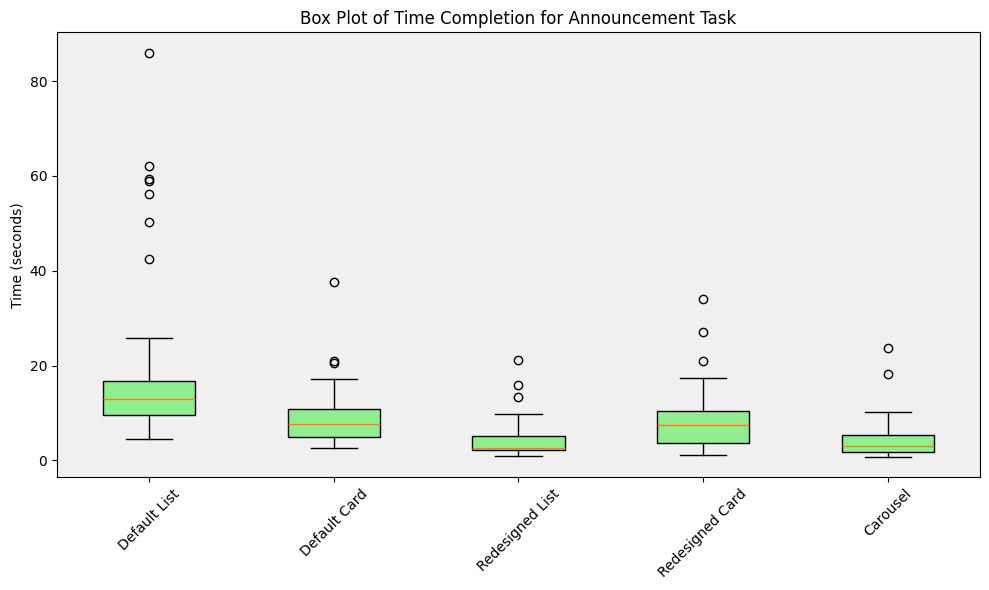

Outliers in Default List: [1, 2, 9, 10, 18, 27, 39]
Outliers in Default Card: [1, 13, 39]
Outliers in Redesigned List: [2, 9, 34]
Outliers in Redesigned Card: [3, 9, 13]
Outliers in Carousel: [31, 34]


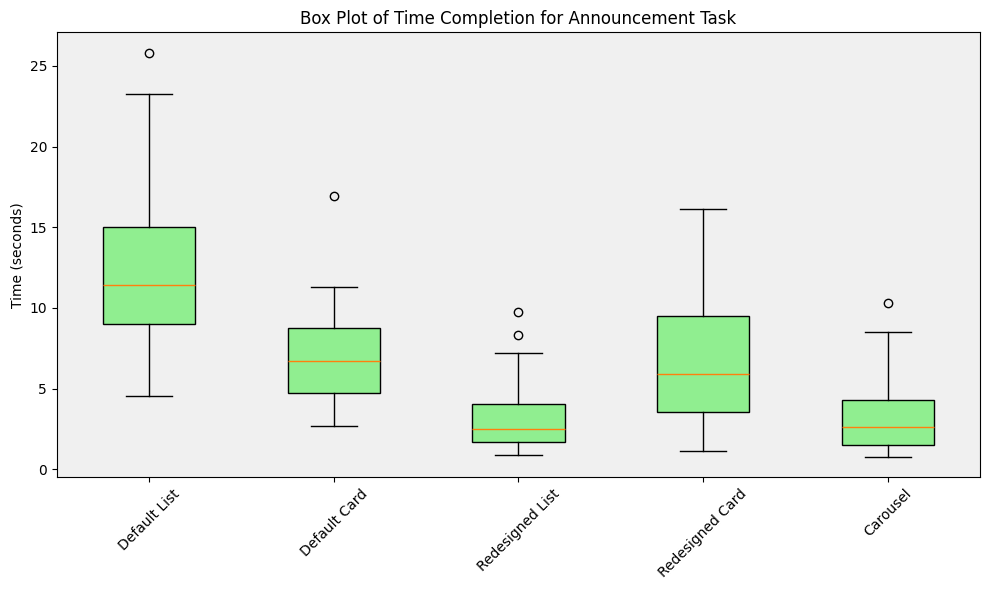

Outliers in Default List: [6]
Outliers in Default Card: [15]
Outliers in Redesigned List: [8, 35]
Outliers in Redesigned Card: []
Outliers in Carousel: [6]


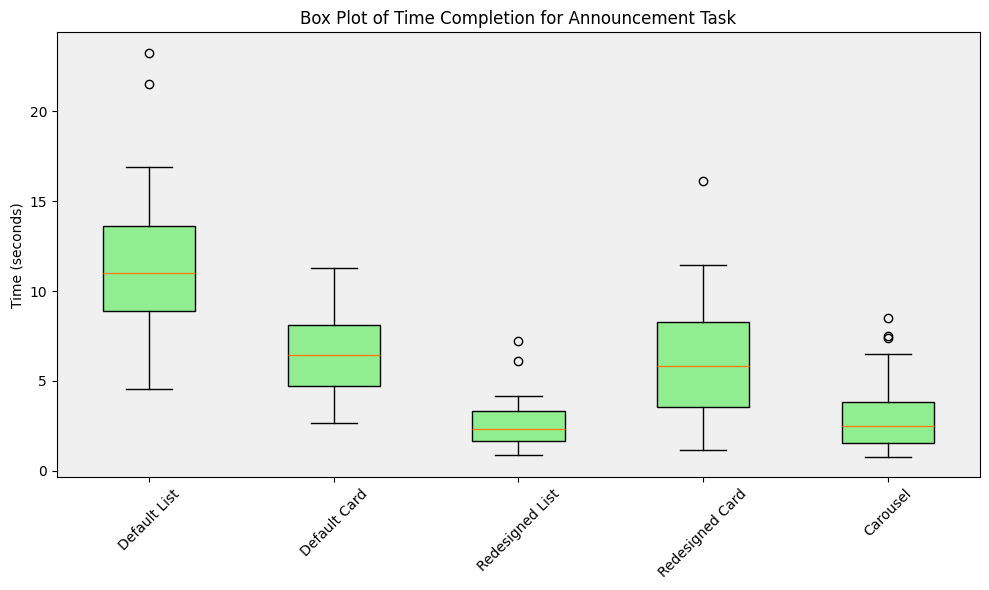

Outliers in Default List: [16, 26]
Outliers in Default Card: []
Outliers in Redesigned List: [4, 19]
Outliers in Redesigned Card: [4]
Outliers in Carousel: [0, 4, 14]


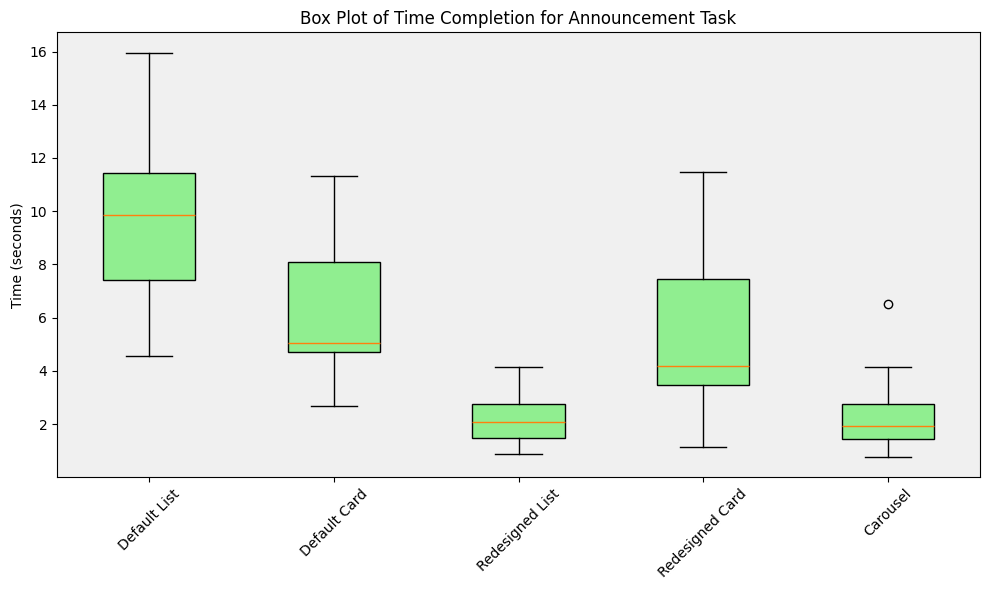

Outliers in Default List: []
Outliers in Default Card: []
Outliers in Redesigned List: []
Outliers in Redesigned Card: []
Outliers in Carousel: [17]


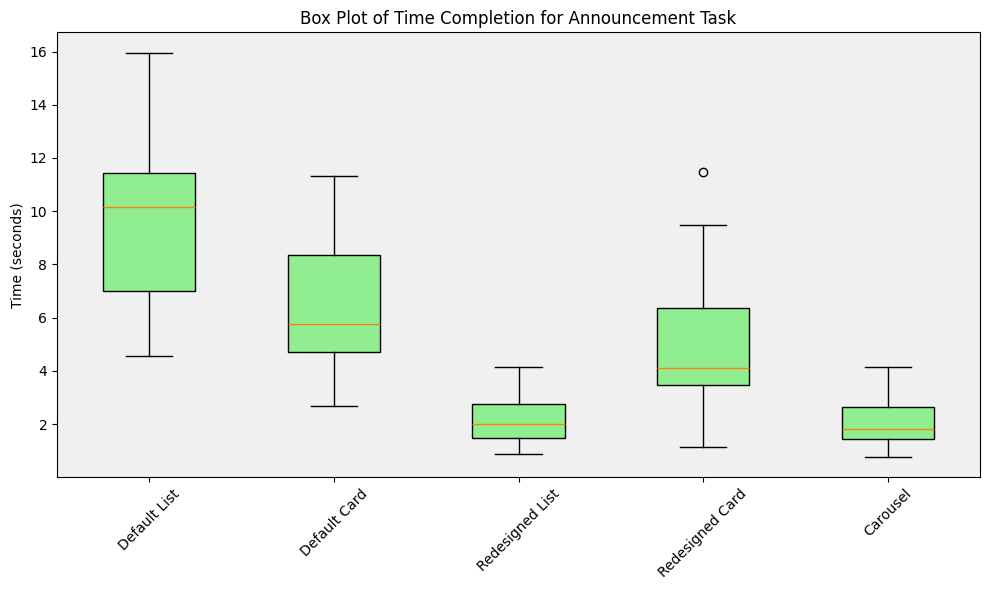

Outliers in Default List: []
Outliers in Default Card: []
Outliers in Redesigned List: []
Outliers in Redesigned Card: [11]
Outliers in Carousel: []


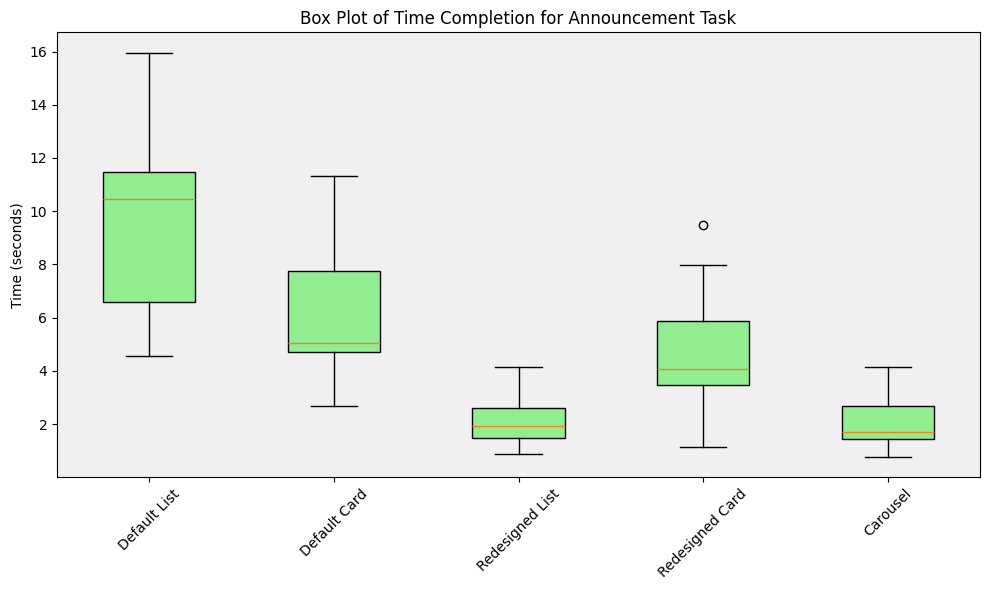

Outliers in Default List: []
Outliers in Default Card: []
Outliers in Redesigned List: []
Outliers in Redesigned Card: [12]
Outliers in Carousel: []


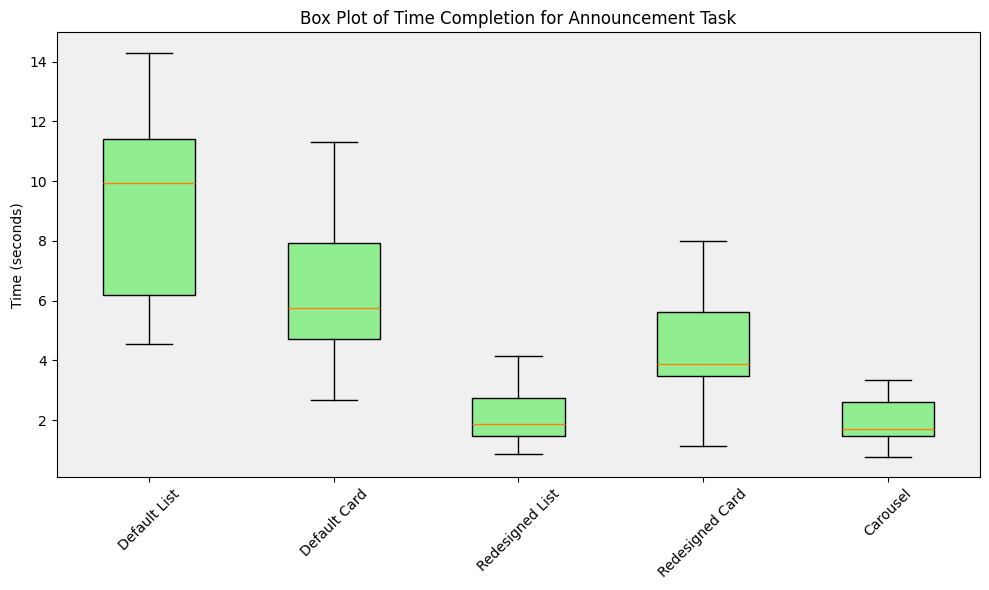

Outliers in Default List: []
Outliers in Default Card: []
Outliers in Redesigned List: []
Outliers in Redesigned Card: []
Outliers in Carousel: []
    Default List  Default Card  Redesigned List  Redesigned Card  Carousel
5        11029.0        9789.0           3916.0           4979.0    3233.0
7        11393.0       11310.0           1628.0           7878.0    1462.0
20       11421.0        7394.0           1312.0           5919.0     778.0
21       11509.0        5062.0           1931.0           3608.0    3003.0
22       13978.0        3796.0           1795.0           4194.0    1496.0
23        7435.0        6924.0           1059.0           3311.0    1103.0
24        9409.0        6689.0           2860.0           7634.0    2046.0
25        5706.0        4948.0           1497.0           4057.0    2623.0
28       10472.0        4694.0           1483.0           3686.0    2764.0
29        5692.0        4700.0           4153.0           5822.0    2511.0
30        8917.0        9216

In [14]:
while True:
    # Convert milliseconds to seconds
    sample2_df_seconds = sample2_df / 1000

    # Create boxplots to visualize outliers
    plt.figure(figsize=(10, 6))
    boxplot = plt.boxplot(sample2_df_seconds.values, patch_artist=True)

    for patch in boxplot['boxes']:
        patch.set_facecolor('lightgreen')
    plt.title('Box Plot of Time Completion for Announcement Task')
    plt.ylabel('Time (seconds)')
    plt.xticks(np.arange(1, len(sample2_df_seconds.columns) + 1), sample2_df_seconds.columns, rotation=45)
    plt.gca().set_facecolor('#F0F0F0')
    plt.tight_layout()
    plt.show()

    # Identify outliers
    outliers = {}
    for col in sample2_df.columns:
        q1 = sample2_df[col].quantile(0.25)
        q3 = sample2_df[col].quantile(0.75)
        iqr = q3 - q1
        outlier_indices = sample2_df[(sample2_df[col] < q1 - 1.5 * iqr) | (sample2_df[col] > q3 + 1.5 * iqr)].index
        outliers[col] = outlier_indices

    for col, indices in outliers.items():
        print(f'Outliers in {col}: {indices.tolist()}')

    if all(len(indices) == 0 for indices in outliers.values()):
        break
        
    # Remove rows with outliers
    for col, indices in outliers.items():
        sample2_df = sample2_df.drop(indices, axis=0, errors='ignore')

print(sample2_df)

# Store the cleaned data into a CSV file
csv_file_path = "cleaned-data2.csv"
sample2_df.to_csv(csv_file_path, index=False)

In [15]:
sample2_df.describe()

,Default List,Default Card,Redesigned List,Redesigned Card,Carousel
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,9453.888889,6397.833333,2192.666667,4405.722222,1948.888889
std,3060.129791,2382.358576,1063.156565,1978.147850,778.920814
min,4553.000000,2679.000000,878.000000,1141.000000,778.000000
25%,6184.000000,4722.750000,1486.500000,3474.750000,1456.750000
50%,9940.500000,5755.500000,1863.000000,3871.500000,1701.500000
75%,11414.000000,7927.250000,2742.500000,5611.250000,2595.000000
max,14302.000000,11310.000000,4153.000000,7984.000000,3340.000000


In [16]:
#Get the mean first


means = sample2_df.mean()

print("Mean of each column:")
print(means)

Mean of each column:
Default List       9453.888889
Default Card       6397.833333
Redesigned List    2192.666667
Redesigned Card    4405.722222
Carousel           1948.888889
dtype: float64


In [17]:
#Get significant difference using One-way ANOVA
df = sample2_df
f_statistic, p_value = f_oneway(df['Default List'], df['Default Card'], df['Redesigned List'], df['Redesigned Card'], df['Carousel'])

# Print results
print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 42.69689942366748
P-value: 1.359668616693006e-19


In [18]:
if p_value < 0.05:
    print("There is a significant difference in the time users take to complete the task of clicking the most recent unread announcement across different layouts of the Canvas Dashboard.")
else:
    print("There is no significant difference in the time users take to complete the task of clicking the most recent unread announcement across different layouts of the Canvas Dashboard.")

There is a significant difference in the time users take to complete the task of clicking the most recent unread announcement across different layouts of the Canvas Dashboard.


In [19]:
tukey_results = pairwise_tukeyhsd(sample2_df.stack(), sample2_df.stack().index.get_level_values(1))

# Print the results
print(tukey_results)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
     group1          group2      meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------------------
       Carousel    Default Card  4448.9444    0.0  2559.0254  6338.8635   True
       Carousel    Default List     7505.0    0.0   5615.081   9394.919   True
       Carousel Redesigned Card  2456.8333 0.0044   566.9143  4346.7524   True
       Carousel Redesigned List   243.7778 0.9964 -1646.1413  2133.6968  False
   Default Card    Default List  3056.0556 0.0002  1166.1365  4945.9746   True
   Default Card Redesigned Card -1992.1111 0.0337 -3882.0301  -102.1921   True
   Default Card Redesigned List -4205.1667    0.0 -6095.0857 -2315.2476   True
   Default List Redesigned Card -5048.1667    0.0 -6938.0857 -3158.2476   True
   Default List Redesigned List -7261.2222    0.0 -9151.1413 -5371.3032   True
Redesigned Card Redesigned List -2213.0556 0.0134 -4

In [20]:
descriptive_stats = sample2_df.describe()

tukey_data = sample2_df.melt(var_name='group', value_name='value')

# Perform Tukey's test
mc = MultiComparison(tukey_data['value'], tukey_data['group'])
tukey_result = mc.tukeyhsd()

# Extract significant results
tukey_summary = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
significant_results = tukey_summary[tukey_summary['reject']]

# Determine the fastest and slowest completion time
fastest_completion_time = descriptive_stats.loc['mean'].idxmin()
slowest_completion_time = descriptive_stats.loc['mean'].idxmax()

print("Descriptive Statistics:")
print(descriptive_stats)
print("\nTukey's Test Results (Significant Comparisons Only):")
print(significant_results)
print("\nConfiguration with the fastest completion time:", fastest_completion_time)
print("\nConfiguration with the slowest completion time:", slowest_completion_time)


Descriptive Statistics:
       Default List  Default Card  Redesigned List  Redesigned Card  \
count     18.000000     18.000000        18.000000        18.000000   
mean    9453.888889   6397.833333      2192.666667      4405.722222   
std     3060.129791   2382.358576      1063.156565      1978.147850   
min     4553.000000   2679.000000       878.000000      1141.000000   
25%     6184.000000   4722.750000      1486.500000      3474.750000   
50%     9940.500000   5755.500000      1863.000000      3871.500000   
75%    11414.000000   7927.250000      2742.500000      5611.250000   
max    14302.000000  11310.000000      4153.000000      7984.000000   

          Carousel  
count    18.000000  
mean   1948.888889  
std     778.920814  
min     778.000000  
25%    1456.750000  
50%    1701.500000  
75%    2595.000000  
max    3340.000000  

Tukey's Test Results (Significant Comparisons Only):
            group1           group2   meandiff   p-adj      lower      upper  \
0         Car

## One-way ANOVA Testing for Idenitifaction Accuracy on Task 1 (Urgent Task)

In [21]:
sample3_df_orig = pd.read_csv("data3.csv")

sample3_df = sample3_df_orig

sample3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Default List     42 non-null     float64
 1   Default Card     42 non-null     float64
 2   Redesigned List  42 non-null     float64
 3   Redesigned Card  42 non-null     float64
 4   Carousel         42 non-null     float64
dtypes: float64(5)
memory usage: 1.8 KB


In [22]:
sample3_df.describe()

,Default List,Default Card,Redesigned List,Redesigned Card,Carousel
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.483897,0.625286,0.857143,0.872487,0.948413
std,0.406790,0.353639,0.263707,0.275136,0.162501
min,0.012987,0.055556,0.250000,0.027778,0.333333
25%,0.114583,0.333333,1.000000,1.000000,1.000000
50%,0.333333,0.500000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


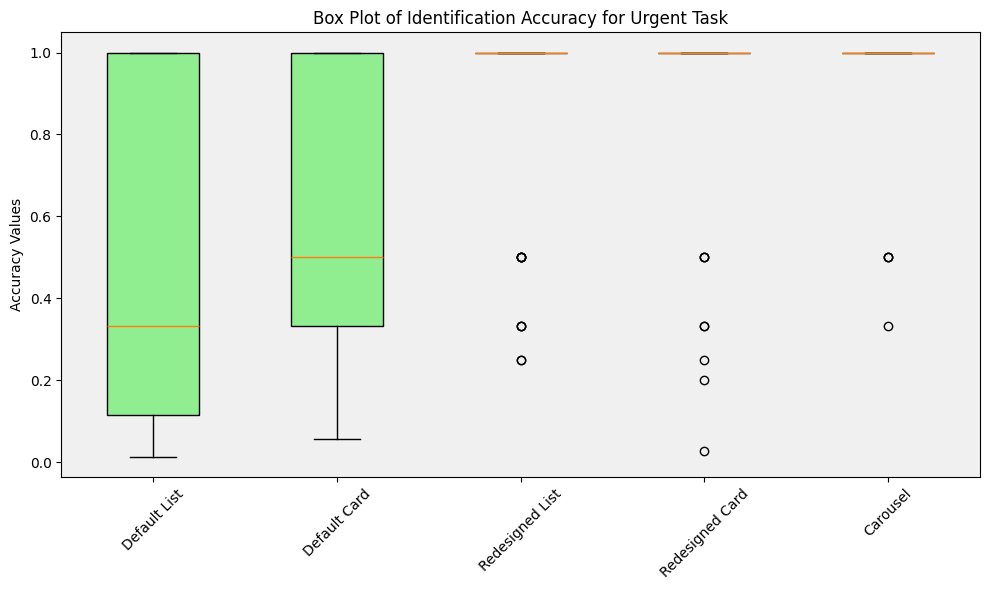

Outliers in Default List: []
Outliers in Default Card: []
Outliers in Redesigned List: [11, 15, 16, 17, 18, 19, 20, 21, 27, 34]
Outliers in Redesigned Card: [2, 14, 15, 16, 20, 25, 33, 36]
Outliers in Carousel: [12, 20, 34, 39]


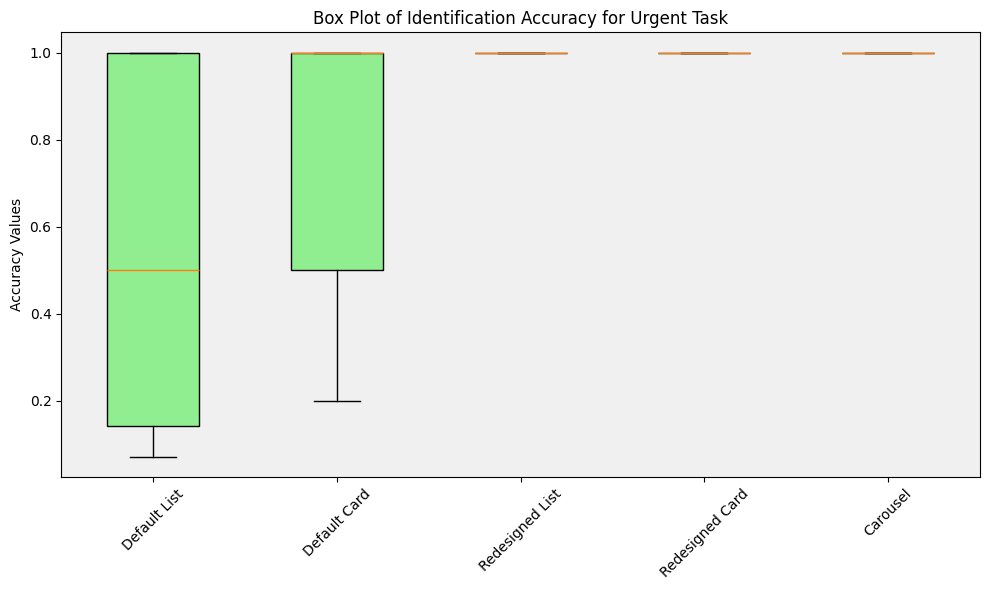

Outliers in Default List: []
Outliers in Default Card: []
Outliers in Redesigned List: []
Outliers in Redesigned Card: []
Outliers in Carousel: []
    Default List  Default Card  Redesigned List  Redesigned Card  Carousel
0       0.500000      0.500000              1.0              1.0       1.0
1       0.071429      0.333333              1.0              1.0       1.0
3       0.250000      0.500000              1.0              1.0       1.0
4       0.100000      1.000000              1.0              1.0       1.0
5       0.500000      1.000000              1.0              1.0       1.0
6       1.000000      1.000000              1.0              1.0       1.0
7       0.333333      0.200000              1.0              1.0       1.0
8       1.000000      0.500000              1.0              1.0       1.0
9       0.142857      1.000000              1.0              1.0       1.0
10      1.000000      1.000000              1.0              1.0       1.0
13      0.111111      0.5000

In [23]:
while True:
    # Create boxplots to visualize outliers
    plt.figure(figsize=(10, 6))
    boxplot = plt.boxplot(sample3_df.values, patch_artist=True)

    for patch in boxplot['boxes']:
        patch.set_facecolor('lightgreen')
    plt.title('Box Plot of Identification Accuracy for Urgent Task')
    plt.ylabel('Accuracy Values')
    plt.xticks(np.arange(1, len(sample3_df.columns) + 1), sample3_df.columns, rotation=45)
    plt.gca().set_facecolor('#F0F0F0')
    plt.tight_layout()
    plt.show()

    # Identify outliers
    outliers = {}
    for col in sample3_df.columns:
        q1 = sample3_df[col].quantile(0.25)
        q3 = sample3_df[col].quantile(0.75)
        iqr = q3 - q1
        outlier_indices = sample3_df[(sample3_df[col] < q1 - 1.5 * iqr) | (sample3_df[col] > q3 + 1.5 * iqr)].index
        outliers[col] = outlier_indices

    for col, indices in outliers.items():
        print(f'Outliers in {col}: {indices.tolist()}')

    if all(len(indices) == 0 for indices in outliers.values()):
        break

    # Remove rows with outliers
    for col, indices in outliers.items():
        sample3_df = sample3_df.drop(indices, axis=0, errors='ignore')

print(sample3_df)

# Store the cleaned data into a CSV file
csv_file_path = "cleaned-data3.csv"
sample3_df.to_csv(csv_file_path, index=False)

In [24]:
sample3_df.describe()

,Default List,Default Card,Redesigned List,Redesigned Card,Carousel
count,25.000000,25.000000,25.0,25.0,25.0
mean,0.542873,0.751333,1.0,1.0,1.0
std,0.400259,0.295879,0.0,0.0,0.0
min,0.071429,0.200000,1.0,1.0,1.0
25%,0.142857,0.500000,1.0,1.0,1.0
50%,0.500000,1.000000,1.0,1.0,1.0
75%,1.000000,1.000000,1.0,1.0,1.0
max,1.000000,1.000000,1.0,1.0,1.0


In [25]:
#Get the mean first


means = sample3_df.mean()

print("Mean of each column:")
print(means)

Mean of each column:
Default List       0.542873
Default Card       0.751333
Redesigned List    1.000000
Redesigned Card    1.000000
Carousel           1.000000
dtype: float64


In [26]:
#Get significant difference using One-way ANOVA
df = sample3_df
f_statistic, p_value = f_oneway(df['Default List'], df['Default Card'], df['Redesigned List'], df['Redesigned Card'], df['Carousel'])

# Print results
print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 21.590583714079848
P-value: 1.9491900841871598e-13


In [27]:
if p_value < 0.05:
    print("There is a significant difference in the identification accuracy when completing the task of clicking the most urgent to-do task across different layouts of the Canvas Dashboard.")
else:
    print("There is no significant difference in the identification accuracy when completing the task of clicking the most urgent to-do task across different layouts of the Canvas Dashboard.")

There is a significant difference in the identification accuracy when completing the task of clicking the most urgent to-do task across different layouts of the Canvas Dashboard.


In [28]:
# Perform Tukey's post hoc test
tukey_results = pairwise_tukeyhsd(sample3_df.stack(), sample3_df.stack().index.get_level_values(1))

# Print the Tukey's test results
print("Tukey's Test Results:")
print(tukey_results)

Tukey's Test Results:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
       Carousel    Default Card  -0.2487 0.0012  -0.423 -0.0743   True
       Carousel    Default List  -0.4571    0.0 -0.6315 -0.2827   True
       Carousel Redesigned Card      0.0    1.0 -0.1744  0.1744  False
       Carousel Redesigned List      0.0    1.0 -0.1744  0.1744  False
   Default Card    Default List  -0.2085 0.0106 -0.3828 -0.0341   True
   Default Card Redesigned Card   0.2487 0.0012  0.0743   0.423   True
   Default Card Redesigned List   0.2487 0.0012  0.0743   0.423   True
   Default List Redesigned Card   0.4571    0.0  0.2827  0.6315   True
   Default List Redesigned List   0.4571    0.0  0.2827  0.6315   True
Redesigned Card Redesigned List      0.0    1.0 -0.1744  0.1744  False
-------------------------------------------------------

In [29]:
descriptive_stats = sample3_df.describe()

tukey_data = sample3_df.melt(var_name='group', value_name='accuracy')

# Perform Tukey's test
mc = MultiComparison(tukey_data['accuracy'], tukey_data['group'])
tukey_result = mc.tukeyhsd()

# Extract significant results
tukey_summary = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
significant_results = tukey_summary[tukey_summary['reject']]

# Determine the configuration with the best and worst identification accuracy
best_accuracy_configuration = descriptive_stats.loc['mean'].idxmax()
worst_accuracy_configuration = descriptive_stats.loc['mean'].idxmin()

print("Descriptive Statistics:")
print(descriptive_stats)
print("\nTukey's Test Results (Significant Comparisons Only):")
print(significant_results)
print("\nConfiguration with the best identification accuracy:", best_accuracy_configuration)
print("Configuration with the worst identification accuracy:", worst_accuracy_configuration)

Descriptive Statistics:
       Default List  Default Card  Redesigned List  Redesigned Card  Carousel
count     25.000000     25.000000             25.0             25.0      25.0
mean       0.542873      0.751333              1.0              1.0       1.0
std        0.400259      0.295879              0.0              0.0       0.0
min        0.071429      0.200000              1.0              1.0       1.0
25%        0.142857      0.500000              1.0              1.0       1.0
50%        0.500000      1.000000              1.0              1.0       1.0
75%        1.000000      1.000000              1.0              1.0       1.0
max        1.000000      1.000000              1.0              1.0       1.0

Tukey's Test Results (Significant Comparisons Only):
         group1           group2  meandiff   p-adj   lower   upper  reject
0      Carousel     Default Card   -0.2487  0.0012 -0.4230 -0.0743    True
1      Carousel     Default List   -0.4571  0.0000 -0.6315 -0.2827    

## One-way ANOVA Testing for Idenitifaction Accuracy on Task 2 (Announcement Task)

In [30]:
sample4_df_orig = pd.read_csv("data4.csv")

sample4_df = sample4_df_orig

sample4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Default List     42 non-null     float64
 1   Default Card     42 non-null     float64
 2   Redesigned List  42 non-null     float64
 3   Redesigned Card  42 non-null     float64
 4   Carousel         42 non-null     float64
dtypes: float64(5)
memory usage: 1.8 KB


In [31]:
sample4_df.describe()

,Default List,Default Card,Redesigned List,Redesigned Card,Carousel
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.503618,0.647336,0.923413,0.706444,0.928571
std,0.392307,0.342635,0.215304,0.359602,0.198718
min,0.035714,0.071429,0.200000,0.100000,0.333333
25%,0.142857,0.333333,1.000000,0.375000,1.000000
50%,0.333333,0.500000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


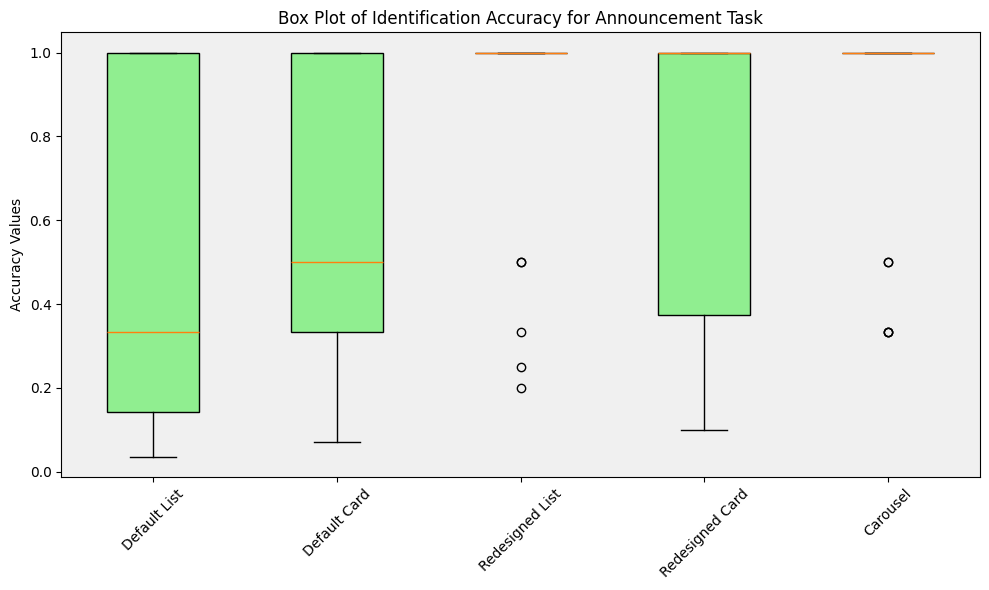

Outliers in Default List: []
Outliers in Default Card: []
Outliers in Redesigned List: [4, 16, 18, 27, 38]
Outliers in Redesigned Card: []
Outliers in Carousel: [15, 21, 27, 28, 29]


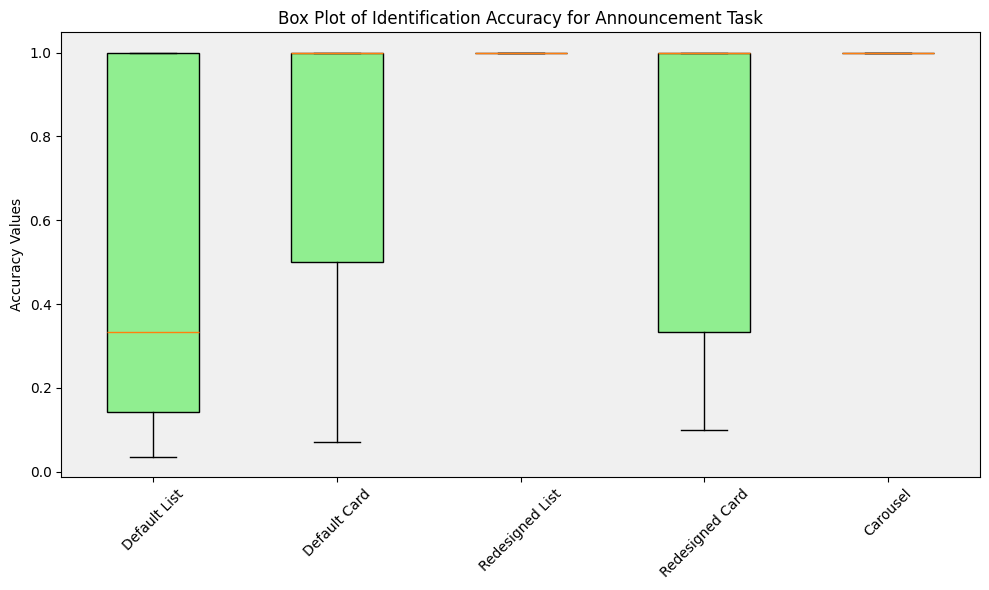

Outliers in Default List: []
Outliers in Default Card: []
Outliers in Redesigned List: []
Outliers in Redesigned Card: []
Outliers in Carousel: []
    Default List  Default Card  Redesigned List  Redesigned Card  Carousel
0       0.250000      0.250000              1.0         0.500000       1.0
1       0.142857      0.500000              1.0         1.000000       1.0
2       0.055556      0.071429              1.0         0.250000       1.0
3       0.333333      1.000000              1.0         0.500000       1.0
5       1.000000      1.000000              1.0         1.000000       1.0
6       0.250000      1.000000              1.0         0.100000       1.0
7       1.000000      1.000000              1.0         0.333333       1.0
8       0.500000      1.000000              1.0         1.000000       1.0
9       1.000000      1.000000              1.0         1.000000       1.0
10      0.500000      0.166667              1.0         0.500000       1.0
11      1.000000      0.5000

In [32]:
while True:
    # Create boxplots to visualize outliers
    plt.figure(figsize=(10, 6))
    boxplot = plt.boxplot(sample4_df.values, patch_artist=True)
    
    for patch in boxplot['boxes']:
        patch.set_facecolor('lightgreen')
    plt.title('Box Plot of Identification Accuracy for Announcement Task')
    plt.ylabel('Accuracy Values')
    plt.xticks(np.arange(1, len(sample4_df.columns) + 1), sample4_df.columns, rotation=45)
    plt.gca().set_facecolor('#F0F0F0')
    plt.tight_layout()
    plt.show()

    # Identify outliers
    outliers = {}
    for col in sample4_df.columns:
        q1 = sample4_df[col].quantile(0.25)
        q3 = sample4_df[col].quantile(0.75)
        iqr = q3 - q1
        outlier_indices = sample4_df[(sample4_df[col] < q1 - 1.5 * iqr) | (sample4_df[col] > q3 + 1.5 * iqr)].index
        outliers[col] = outlier_indices

    for col, indices in outliers.items():
        print(f'Outliers in {col}: {indices.tolist()}')

    if all(len(indices) == 0 for indices in outliers.values()):
        break

    # Remove rows with outliers
    for col, indices in outliers.items():
        sample4_df = sample4_df.drop(indices, axis=0, errors='ignore')

print(sample4_df)

# Store the cleaned data into a CSV file
csv_file_path = "cleaned-data4.csv"
sample4_df.to_csv(csv_file_path, index=False)

In [33]:
sample4_df.describe()

,Default List,Default Card,Redesigned List,Redesigned Card,Carousel
count,33.000000,33.000000,33.0,33.000000,33.0
mean,0.515520,0.689033,1.0,0.696080,1.0
std,0.391349,0.343163,0.0,0.353689,0.0
min,0.035714,0.071429,1.0,0.100000,1.0
25%,0.142857,0.500000,1.0,0.333333,1.0
50%,0.333333,1.000000,1.0,1.000000,1.0
75%,1.000000,1.000000,1.0,1.000000,1.0
max,1.000000,1.000000,1.0,1.000000,1.0


In [34]:
#Get the mean first


means = sample4_df.mean()

print("Mean of each column:")
print(means)

Mean of each column:
Default List       0.515520
Default Card       0.689033
Redesigned List    1.000000
Redesigned Card    0.696080
Carousel           1.000000
dtype: float64


In [35]:
#Get significant difference using One-way ANOVA
df = sample4_df
f_statistic, p_value = f_oneway(df['Default List'], df['Default Card'], df['Redesigned List'], df['Redesigned Card'], df['Carousel'])

# Print results
print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 18.964776161753463
P-value: 8.798142596417667e-13


In [36]:
if p_value < 0.05:
    print("There is a significant difference in the identification accuracy when completing the task of clicking the most recent unread announcement across different layouts of the Canvas Dashboard.")
else:
    print("There is no significant difference in the identification accuracy when completing the task of clicking the most recent unread announcement across different layouts of the Canvas Dashboard.")

There is a significant difference in the identification accuracy when completing the task of clicking the most recent unread announcement across different layouts of the Canvas Dashboard.


In [37]:
# Perform Tukey's post hoc test
tukey_results = pairwise_tukeyhsd(sample4_df.stack(), sample4_df.stack().index.get_level_values(1))

# Print the Tukey's test results
print("Tukey's Test Results:")
print(tukey_results)

Tukey's Test Results:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
       Carousel    Default Card   -0.311 0.0001 -0.5021 -0.1198   True
       Carousel    Default List  -0.4845    0.0 -0.6756 -0.2933   True
       Carousel Redesigned Card  -0.3039 0.0002 -0.4951 -0.1128   True
       Carousel Redesigned List      0.0    1.0 -0.1912  0.1912  False
   Default Card    Default List  -0.1735 0.0947 -0.3647  0.0176  False
   Default Card Redesigned Card    0.007    1.0 -0.1841  0.1982  False
   Default Card Redesigned List    0.311 0.0001  0.1198  0.5021   True
   Default List Redesigned Card   0.1806  0.074 -0.0106  0.3717  False
   Default List Redesigned List   0.4845    0.0  0.2933  0.6756   True
Redesigned Card Redesigned List   0.3039 0.0002  0.1128  0.4951   True
-------------------------------------------------------

In [38]:
descriptive_stats = sample4_df.describe()

tukey_data = sample4_df.melt(var_name='group', value_name='accuracy')

# Perform Tukey's test
mc = MultiComparison(tukey_data['accuracy'], tukey_data['group'])
tukey_result = mc.tukeyhsd()

# Extract significant results
tukey_summary = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
significant_results = tukey_summary[tukey_summary['reject']]

# Determine the configuration with the best and worst identification accuracy
best_accuracy_configuration = descriptive_stats.loc['mean'].idxmax()
worst_accuracy_configuration = descriptive_stats.loc['mean'].idxmin()

print("Descriptive Statistics:")
print(descriptive_stats)
print("\nTukey's Test Results (Significant Comparisons Only):")
print(significant_results)
print("\nConfiguration with the best identification accuracy:", best_accuracy_configuration)
print("Configuration with the worst identification accuracy:", worst_accuracy_configuration)

Descriptive Statistics:
       Default List  Default Card  Redesigned List  Redesigned Card  Carousel
count     33.000000     33.000000             33.0        33.000000      33.0
mean       0.515520      0.689033              1.0         0.696080       1.0
std        0.391349      0.343163              0.0         0.353689       0.0
min        0.035714      0.071429              1.0         0.100000       1.0
25%        0.142857      0.500000              1.0         0.333333       1.0
50%        0.333333      1.000000              1.0         1.000000       1.0
75%        1.000000      1.000000              1.0         1.000000       1.0
max        1.000000      1.000000              1.0         1.000000       1.0

Tukey's Test Results (Significant Comparisons Only):
            group1           group2  meandiff   p-adj   lower   upper  reject
0         Carousel     Default Card   -0.3110  0.0001 -0.5021 -0.1198    True
1         Carousel     Default List   -0.4845  0.0000 -0.6756 -0